In [2]:
import pandas as pd
import numpy as np
import os
import dateutil.parser
from collections import Counter
from itertools import combinations
from datetime import datetime
import matplotlib.pyplot as plt
import statistics

In [3]:
df = pd.DataFrame()

In [4]:
files = [file for file in os.listdir("M:/e store/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data")]
for file in files:
    df = pd.concat([df,pd.read_csv(f"M:/e store/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/{file}")],ignore_index=True)


In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [6]:
df.dropna(inplace=True)
df.index = range(len(df.index))

In [7]:
df = df[df['Order Date']!='Order Date']

### Month of maximum sale

In [8]:
prod = []
ind = []
df['month_no'] = df['Order Date'].str[0:2]
df['month_no'] = df['month_no'].astype('int32')
for m in df['month_no'].unique():
    df_temp = df[df['month_no']==m]
    df_temp['Quantity Ordered'] = df_temp['Quantity Ordered'].astype('int32')
    df_temp['Price Each'] = pd.to_numeric(df_temp['Price Each'])                  # you can actually do pd.to_numeric if you do not know wich kind of dtype should be good for series
    sum_pro = (df_temp['Quantity Ordered']*df_temp['Price Each']).sum()
    prod.append(sum_pro)
    ind.append(m)
print(f'maximum sale value is {max(prod)} and',f"month of max sale is {ind[prod.index(max(prod))]}")

maximum sale value is 4613443.34 and month of max sale is 12


c:\users\miksh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
c:\users\miksh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\miksh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [9]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['sales'] = df['Quantity Ordered']*df['Price Each']
grp_by = df.groupby('month_no')
print(f'month of max sale is ', grp_by['sales'].sum().argmax()+1,f'and max sale value is ',grp_by['sales'].sum().max())

month of max sale is  12 and max sale value is  4613443.340001534


### State with maximum number of items ordered

In [10]:
comma = df['Purchase Address'].str.split(',')                  
def coma(ind):
    try:
        return comma[ind][1]
    except:
        np.NaN
df['city_col'] = list(map(coma,df.index))     

In [11]:
lis = []
for city in df['city_col'].unique():
    lis.append([df[df['city_col']==city]['Quantity Ordered'].sum(),city])
max = 0    
for i in range(len(lis)):
    if lis[:][i][0] > max:
        max_city = lis[:][i][1]
        max = lis[:][i][0]
print(f'the city with max number of product sold is {max_city}')    

the city with max number of product sold is  San Francisco


In [12]:
df['city_col'] = df['Purchase Address'].apply(lambda city:  f"{city.split(',')[1]} ({city.split(',')[2].split(' ')[1]})" )
# print(df.head())
grp_city = df.groupby('city_col')
print(f'the city with max number of product sold is', grp_city['Quantity Ordered'].sum().sort_values()[-1:].index.values[0])

the city with max number of product sold is  San Francisco (CA)


### Items that are sold together the most

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [14]:
df_dupli = df[df['Order Date'].duplicated(keep=False)]                     
df_dupli['collec_prod'] = df_dupli.groupby('Order Date')['Product'].transform(lambda x: ','.join(x))
df_dupli = df_dupli[['Order ID','collec_prod']].drop_duplicates()

                                                                        
count = Counter()                                         
for i in df_dupli['collec_prod']:
    lstt = i.split(',')
    count.update(Counter(combinations(lstt,3)))
print(count.most_common(5))


c:\users\miksh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[(('Google Phone', 'USB-C Charging Cable', 'Wired Headphones'), 231), (('iPhone', 'Lightning Charging Cable', 'Wired Headphones'), 179), (('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones'), 148), (('USB-C Charging Cable', 'iPhone', 'Lightning Charging Cable'), 112), (('Wired Headphones', 'Google Phone', 'USB-C Charging Cable'), 105)]


### Item which is sold the most

In [15]:
grp_product = df.groupby('Product')


In [16]:
grp_product['Quantity Ordered'].sum().sort_values()[-1:].index.values[0]

'AAA Batteries (4-pack)'

### Most common time of placing orders

In [17]:
a = []
for i in df['Order Date'].index:
    a.append(str(df.loc[i,'Order Date'].hour)) 

In [18]:
df['hour'] = a

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month_no,sales,city_col,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


Text(0, 0.5, 'Quantity')

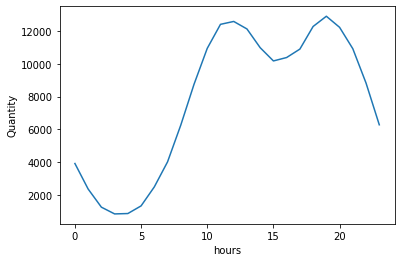

In [20]:
hours = [hour for hour,df in df.groupby('hour')]
hours = np.array(hours)
hours = hours.astype(int)
hours.sort()
aa = df.groupby(['hour']).count()
aa.index = aa.index.astype(int)
aa = aa.sort_index()
plt.plot(hours,aa['Quantity Ordered'].values)
plt.xlabel('hours')
plt.ylabel('Quantity')